# Applied Machine Learning: HW 4
Virginia Lu (vl239), Sylvia Nie (hn327)

## 1. Clustering for text analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

In [2]:
vocab = np.genfromtxt('science2k-vocab.txt', dtype='str')   # vector of terms
titles = np.genfromtxt('science2k-titles.txt', dtype='str', delimiter='""')   # vector of titles
doc_word = np.load('science2k-doc-word.npy')   # matrix of 1373 articles x 5476 document-wise word features
word_doc = np.load('science2k-word-doc.npy')   # matrix of 5476 term-wise word features x 1373 articles

### Part (a)
#### Cluster the documents using k-means and various values of k (up to k=20). Select a value of k and report the top 10 words of each cluster in order of the largest positive distance from the average value across all data.

In [3]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter      

        
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self  

In [107]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(doc_word)

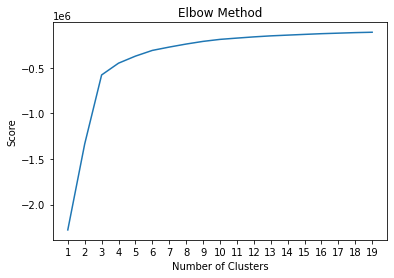

In [5]:
number_clusters = range(1, 20)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]   # using sklearn.cluster.KMeans for Elbow Method
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.xticks(number_clusters)
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

Using the Elbow Method, we predict that the best number of clusters is k = 3.

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


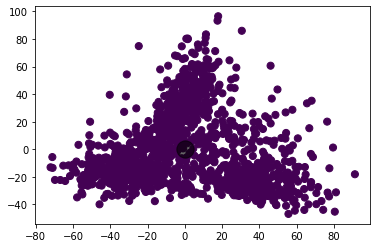

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


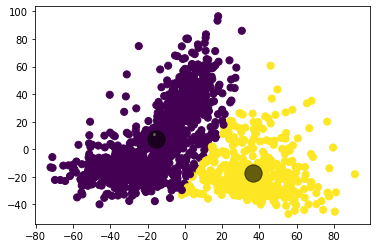

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


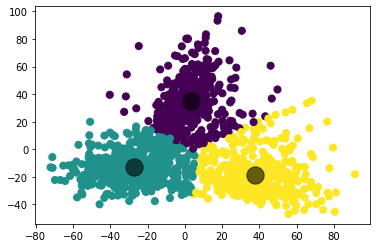

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


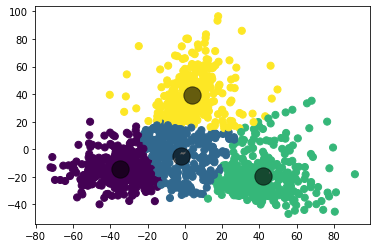

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


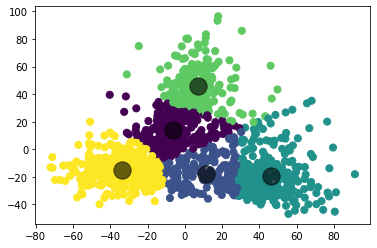

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


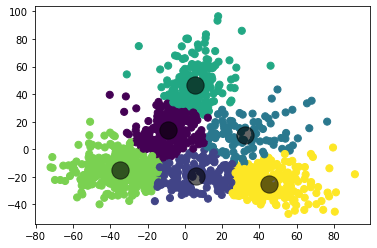

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


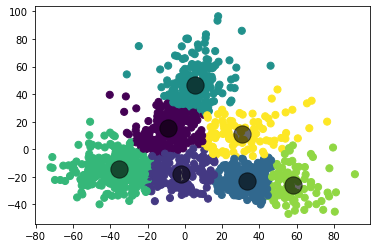

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


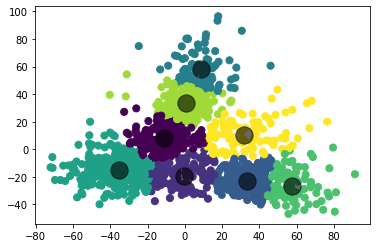

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


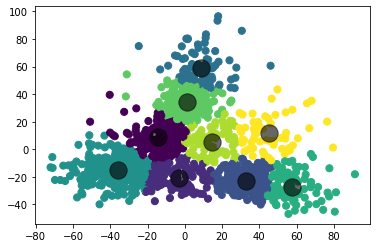

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


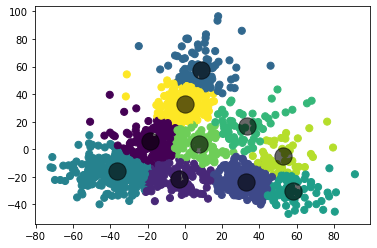

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


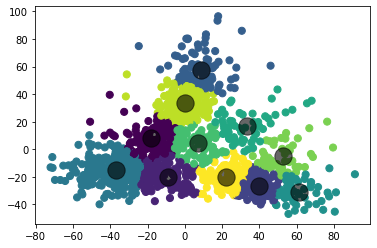

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


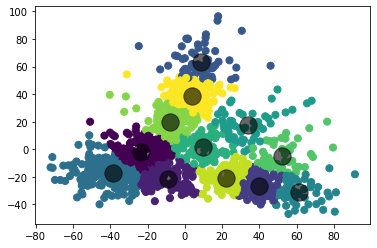

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


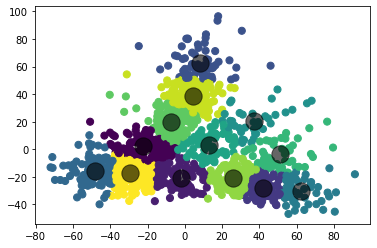

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


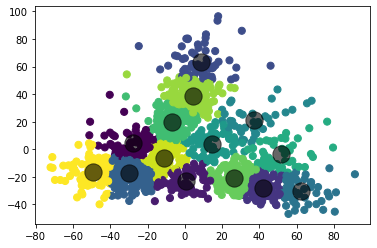

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


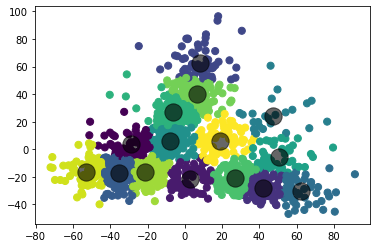

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


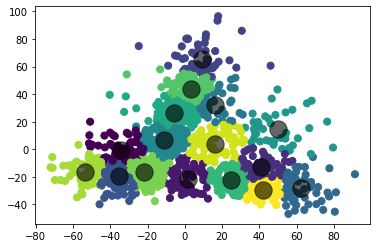

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


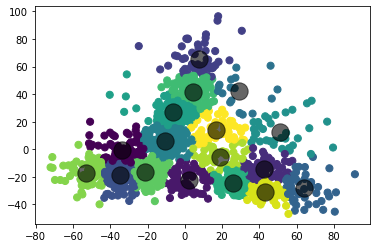

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


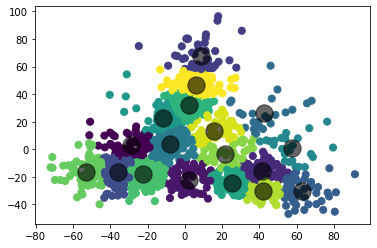

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


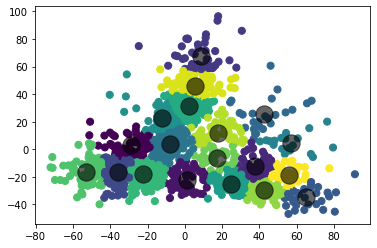

In [6]:
for i in number_clusters:
    test_e = Kmeans(i, 1, 600)   # using our Kmeans class
    fitted = test_e.fit_kmeans(Y_sklearn)
    predicted_values = test_e.predict(Y_sklearn)

    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

    centers = fitted.centroids
    plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
    plt.show()

We select k = 3. 

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


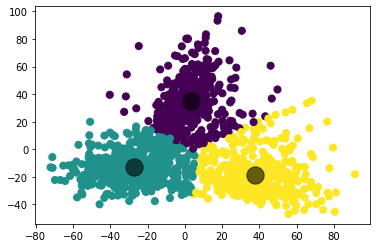

In [7]:
test_e = Kmeans(3, 1, 600)   # using our Kmeans class
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
plt.show()

In [11]:
def get_top_features_and_docs_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 1) # returns average score across cluster
        dist = [(np.linalg.norm(centers[label]-Y_sklearn[k])) for k in id_temp[0]]
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 10 scores
        sorted_dist = np.argsort(dist)[::-1][:n_feats]
        features = vocab
        docs = titles
        best_features = [(features[i]) for i in sorted_means]
        best_docs = [(docs[j]) for j in sorted_dist]
        d = {'features': best_features, 'documents': best_docs}
        df = pd.DataFrame(data=d)
        dfs.append(df)
    return dfs
dfs = get_top_features_and_docs_cluster(doc_word, predicted_values, 10)

In [12]:
print('Cluster 1')
dfs[0]

Cluster 1


,features,documents
0,compared,"""Limbless Tetrapods and Snakes with Legs"""
1,area,"""Consumer Power Heralds Hard Times for Researc..."
2,mouse,"""A Population of Murine gd T Cells That Recogn..."
3,solution,"""A Role for Nuclear Inositol 1,4,5-Trisphospha..."
4,direct,"""Resistance to Bt Toxins"""
5,phys,"""Multidecadal Changes in the Vertical Temperat..."
6,additional,"""Molecules in a Bose-Einstein Condensate"""
7,reports,"""Information Storage and Retrieval through Qua..."
8,wild,"""Density of Phonon States in Iron at High Pres..."
9,cells,"""Archaeology in the Holy Land"""


In [13]:
print('Cluster 2')
dfs[1]

Cluster 2


,features,documents
0,stars,"""Role of the Enteric Nervous System in the Flu..."
1,experiments,"""Superbugs on the Hoof?"""
2,animals,"""Mirrorless Lasing from Mesostructured Wavegui..."
3,pathway,"""Structure and Function of a Human <latex>$TAF..."
4,term,"""Identification of Vaccine Candidates against ..."
5,essential,"""A Powerhouse Divided"""
6,provide,"""DNA Banks for Endangered Animal Species"""
7,blue,"""Template Boundary in a Yeast Telomerase Speci..."
8,binding,"""Ethanol-Induced Apoptotic Neurodegeneration a..."
9,populations,"""Nonbiological Fractionation of Iron Isotopes"""


In [14]:
print('Cluster 3')
dfs[2]

Cluster 3


,features,documents
0,form,"""Cool Glacial Temperatures and Changes in Mois..."
1,elements,"""The Spirit of Discovery"""
2,yeast,"""Mice Are Not Furry Petri Dishes"""
3,presence,"""Regulation of Protein Secretion through Contr..."
4,sequences,"""The Latest News from Mars"""
5,events,"""Retraction"""
6,sites,"""Trojan Horses"""
7,measured,"""Communication through a Diffusive Medium: Coh..."
8,population,"""Dual Signaling Regulated by Calcyon, a D1 Dop..."
9,green,"""Rutile-Bearing Refractory Eclogites: Missing ..."


#### What has the algorithm captured? How might such an algorithm be useful?
The algorithm has captured commonalities between words in each cluster or any particular words that stand out, which can be useful in identifying themes within each cluster of documents. This gives us a way of getting a general feel for what the articles contain and can guide any further analysis we wish to do.

### Part (b)
#### Repeat the analysis above, but cluster terms instead of documents.

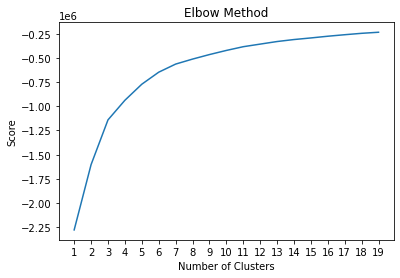

In [15]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(word_doc)

number_clusters = range(1, 20)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]   # using sklearn.cluster.KMeans for Elbow Method
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.xticks(number_clusters)
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


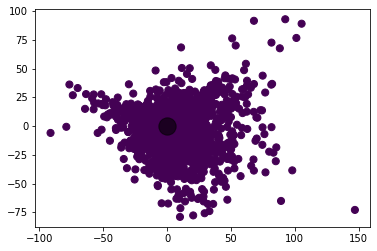

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


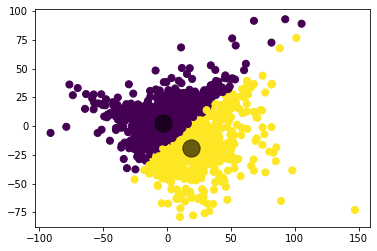

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


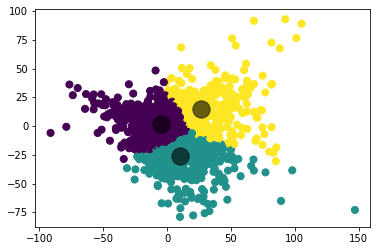

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


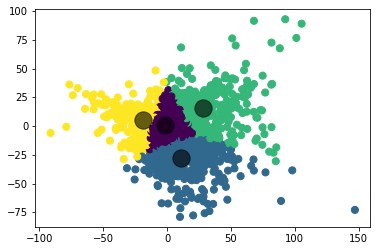

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


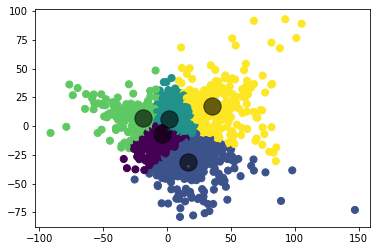

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


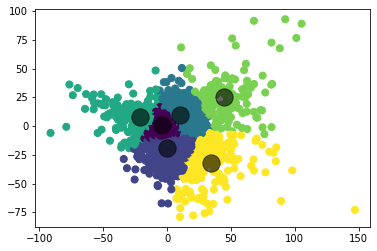

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


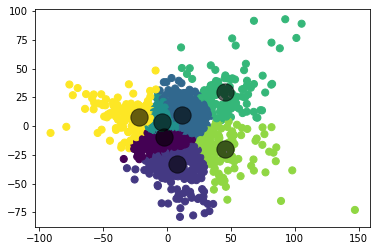

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


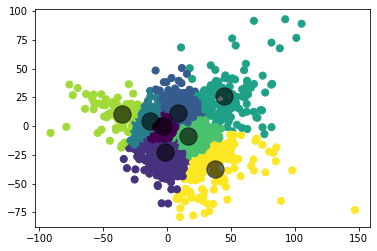

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


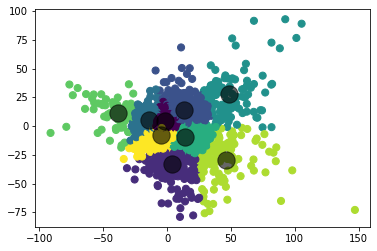

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


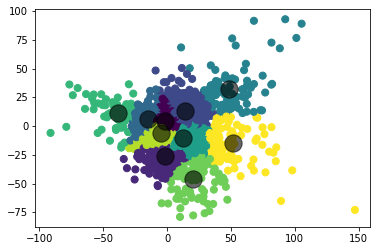

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


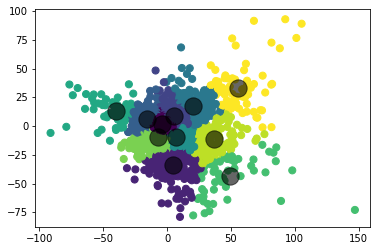

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


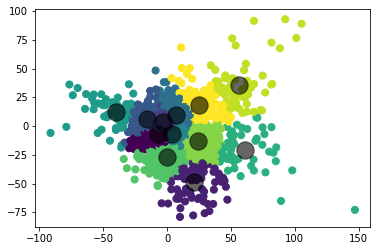

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


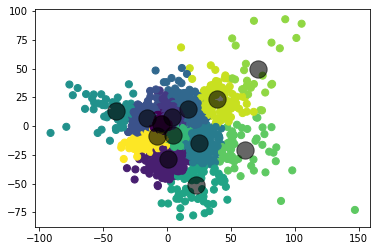

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


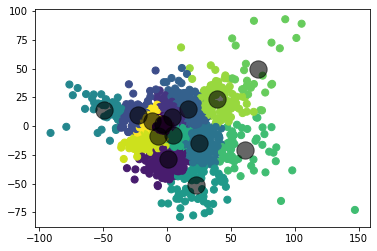

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


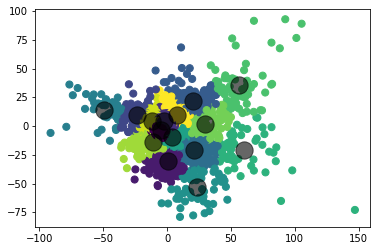

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


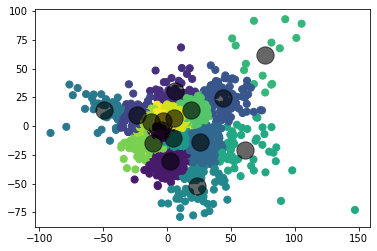

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


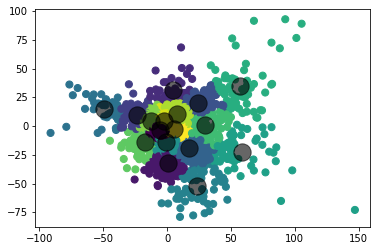

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


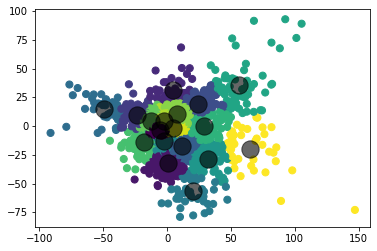

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


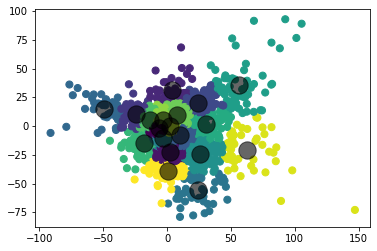

In [16]:
# Using the Elbow Method, we predict that the best number of clusters is k = 3.

for i in number_clusters:
    test_e = Kmeans(i, 1, 600)   # using our Kmeans class
    fitted = test_e.fit_kmeans(Y_sklearn)
    predicted_values = test_e.predict(Y_sklearn)

    plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

    centers = fitted.centroids
    plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
    plt.show()

Running Model Iteration 0 
Running Model Iteration 100 
Running Model Iteration 200 
Running Model Iteration 300 
Running Model Iteration 400 
Running Model Iteration 500 
Model finished running


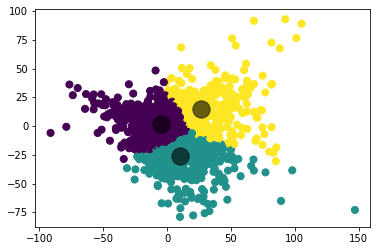

Cluster 1


,features,documents
0,emission,"""Reading the Worm Genome"""
1,known,"""Nota Bene: Sensing Old Age"""
2,mantle,"""New Probe to Chart the Milky Way"""
3,form,"""Toward the End of <latex>$PuO{_2}'s$</latex> ..."
4,initial,"""Sex Determination in Malaria Parasites"""
5,neurons,"""Mirrorless Lasing from Mesostructured Wavegui..."
6,humans,"""Requirement of CD9 on the Egg Plasma Membrane..."
7,present,"""Dopaminergic Loss and Inclusion Body Formatio..."
8,showed,"""Clonal Propagation of Primate Offspring by Em..."
9,method,"""The Changing Morphology and Increasing Decele..."


In [20]:
# We select k = 3. 

test_e = Kmeans(3, 1, 600)   # using our Kmeans class
fitted = test_e.fit_kmeans(Y_sklearn)
predicted_values = test_e.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

centers = fitted.centroids
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);
plt.show()

def get_top_features_and_docs_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 1) # returns average score across cluster
        dist = [(np.linalg.norm(centers[label]-Y_sklearn[k])) for k in id_temp[0]]
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 10 scores
        sorted_dist = np.argsort(dist)[::-1][:n_feats]
        features = vocab
        docs = titles
        best_features = [(features[i]) for i in sorted_means]
        best_docs = [(docs[j]) for j in sorted_dist]
        d = {'features': best_features, 'documents': best_docs}
        df = pd.DataFrame(data=d)
        dfs.append(df)
    return dfs
dfs = get_top_features_and_docs_cluster(word_doc, predicted_values, 10)

print('Cluster 1')
dfs[0]

In [21]:
print('Cluster 2')
dfs[1]

Cluster 2


,features,documents
0,relatively,"""Archaeology in the Holy Land"""
1,consistent,"""Reading the Worm Genome"""
2,layer,"""Tracing the Origins of Salmonella Outbreaks"""
3,appears,"""New Age Semiconductors Pick up the Pace"""
4,terminal,"""Monitoring and Labeling for Genetically Modif..."
5,subunit,"""Neutral, Single-Component Nickel (II) Polyole..."
6,synaptic,"""A Tail of Histone Acetylation and DNA Recombi..."
7,process,"""Influences of Dietary Uptake and Reactive Sul..."
8,containing,"""Brane-Worlds"""
9,sites,"""The Baryon Halo of the Milky Way: A Fossil Re..."


In [22]:
print('Cluster 3')
dfs[2]

Cluster 3


,features,documents
0,nuclear,"""Duchamp's L.H.O.O.Q.-From 1919 or 1930?"""
1,class,"""Archaeology in the Holy Land"""
2,days,"""Baedeker's Guide, or Just Plain 'Trouble'?"""
3,strong,"""Corrections and Clarifications: Commercializa..."
4,effect,"""Brane-Worlds"""
5,measured,"""Will Tribal Knowledge Survive the Millennium?"""
6,growth,"""The Changing Morphology and Increasing Decele..."
7,value,"""Cool Glacial Temperatures and Changes in Mois..."
8,order,"""Structural Basis of Smad2 Recognition by the ..."
9,temperature,"""Reading the Worm Genome"""


#### How might such an algorithm be useful? What is different about clustering terms from clustering documents?
While clustering documents gives us information about common words and themes among each cluster of articles, clustering terms gives us information on the articles containing similar words. Such an algorithm can be used to find documents pertaining to the same or similar subject matter. 

## 2. EM algorithm and implementation

### Part (a)
#### Parse and plot all data points on 2-D plane.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Old Faithful Geyser Dataset: 272 observations of (eruption time, waiting time)
# Each entry a 2-D feature vector

erupt_wait_times = np.loadtxt('/Users/sylvia/Desktop/AML/HW4/old_faithful.txt')
erupt_times = erupt_wait_times[:,0]
wait_times = erupt_wait_times[:,1]

ValueError: could not convert string to float: 'Old'

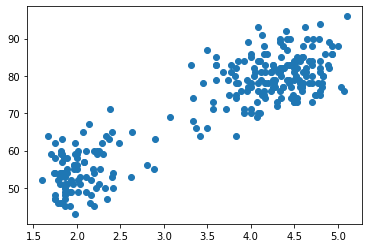

In [87]:
plt.scatter(erupt_times, wait_times)

### Part (b)
#### Implement a bimodal GMM model to fit all data points using EM algorithm. Explain the reasoning behind your termination criteria. 
#### Plot the trajectories of two mean vectors in 2 dimensions (i.e., coordinates vs. iteration). 
#### Run your program for 50 times with different initial parameter guesses. Show the distribution of the total number of iterations needed for algorithm to converge.

In [173]:
class GMM:
    def __init__(self, n_components, max_iter = 100):
        self.n_components = n_components
        self.max_iter = max_iter
        self.comp_names = [index for index in range(self.n_components)]
        # pi list contains the fraction of the dataset for every cluster
        self.pi = [1/self.n_components for comp in range(self.n_components)]

    def multivariate_normal(self, X, mean_vector, covariance_matrix):
        return (2*np.pi)**(-len(X)/2)*np.linalg.det(covariance_matrix)**(-1/2)*np.exp(-np.dot(np.dot((X-mean_vector).T, np.linalg.inv(covariance_matrix)), (X-mean_vector))/2)

    def fit(self, X):
        # Spliting the data in n_components sub-sets
        new_X = np.array_split(X, self.n_components)
        # Initial computation of the mean-vector and covarience matrix
        self.mean_vector = [np.mean(x, axis=0) for x in new_X]
        self.covariance_matrixes = [np.cov(x.T) for x in new_X]
        # Deleting the new_X matrix because we will not need it anymore
        del new_X
        for iteration in range(self.max_iter):
            ''' --------------------------   E - STEP   -------------------------- '''
            # Initiating the r matrix, evrey row contains the probabilities
            # for every cluster for this row
            self.r = np.zeros((len(X), self.n_components))
            # Calculating the r matrix
            for n in range(len(X)):
                for k in range(self.n_components):
                    self.r[n][k] = self.pi[k] * self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
                    self.r[n][k] /= sum([self.pi[j]*self.multivariate_normal(X[n], self.mean_vector[j], self.covariance_matrixes[j]) for j in range(self.n_components)])
            # Calculating the N
            N = np.sum(self.r, axis=0)
            ''' --------------------------   M - STEP   -------------------------- '''
            # Initializing the mean vector as a zero vector
            self.mean_vector = np.zeros((self.n_components, len(X[0])))
            # Updating the mean vector
            for k in range(self.n_components):
                for n in range(len(X)):
                    self.mean_vector[k] += self.r[n][k] * X[n]
            self.mean_vector = [1/N[k]*self.mean_vector[k] for k in range(self.n_components)]
            # Initiating the list of the covariance matrixes
            self.covariance_matrixes = [np.zeros((len(X[0]), len(X[0]))) for k in range(self.n_components)]
            # Updating the covariance matrices
            for k in range(self.n_components):
                self.covariance_matrixes[k] = np.cov(X.T, aweights=(self.r[:, k]), ddof=0)
            self.covariance_matrixes = [1/N[k]*self.covariance_matrixes[k] for k in range(self.n_components)]
            # Updating the pi list
            self.pi = [N[k]/len(X) for k in range(self.n_components)]
            
    def predict(self, X):
        probas = []
        for n in range(len(X)):
            probas.append([self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
                           for k in range(self.n_components)])
        cluster = []
        for proba in probas:
            cluster.append(self.comp_names[proba.index(max(proba))])
        return cluster

In [180]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(erupt_wait_times)

In [181]:
Y_sklearn

array([[-8.08828024e+00,  4.99971159e-01],
       [ 1.69762637e+01,  4.07036971e-01],
       [-3.08239404e+00,  3.88649845e-01],
       [ 8.96263224e+00,  5.29510387e-01],
       [-1.41416022e+01,  2.27057650e-02],
       [ 1.58973395e+01, -5.97359164e-01],
       [-1.71456474e+01,  8.27179681e-02],
       [-1.40711497e+01,  9.53041964e-01],
       [ 1.99563717e+01,  3.09298315e-02],
       [-1.41277835e+01,  2.05183283e-01],
       [ 1.69737718e+01,  3.74131189e-01],
       [-1.30979420e+01,  5.61435228e-01],
       [-7.13644241e+00, -1.73827587e-01],
       [ 2.39600537e+01, -7.16883905e-02],
       [-1.21599229e+01, -2.94841036e-01],
       [ 1.89428407e+01, -1.09938813e-01],
       [ 9.00288003e+00,  1.06098862e+00],
       [-1.31646189e+01, -3.19043726e-01],
       [ 1.89856559e+01,  4.55442350e-01],
       [-8.13736291e+00, -1.48173031e-01],
       [ 1.99676984e+01,  1.80501568e-01],
       [ 2.39600537e+01, -7.16883905e-02],
       [-7.07980856e+00,  5.74031094e-01],
       [ 1.

In [182]:
erupt_wait_times

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ],
       [ 1.833, 54.   ],
       [ 3.917, 84.   ],
       [ 4.2  , 78.   ],
       [ 1.75 , 47.   ],
       [ 4.7  , 83.   ],
       [ 2.167, 52.   ],
       [ 1.75 , 62.   ],
       [ 4.8  , 84.   ],
       [ 1.6  , 52.   ],
       [ 4.25 , 79.   ],
       [ 1.8  , 51.   ],
       [ 1.75 , 47.   ],
       [ 3.45 , 78.   ],
       [ 3.067, 69.   ],
       [ 4.533, 74.   ],
       [ 3.6  , 83.   ],
       [ 1.967, 55.   ],
       [ 4.083, 76.   ],
       [ 3.85 , 78.   ],
       [ 4.433, 79.   ],
       [ 4.3  , 73.   ],
       [ 4.467, 77.   ],
       [ 3.367, 66.   ],
       [ 4.033, 80.   ],
       [ 3.833, 74.   ],
       [ 2.017, 52.   ],
       [ 1.867, 48.   ],
       [ 4.833, 80.   ],
       [ 1.833, 59.   ],
       [ 4.783, 90.   ],


In [183]:
test = GMM(n_components = 3)
fitted = test.fit(Y_sklearn)
predicted_values = test.predict(Y_sklearn)

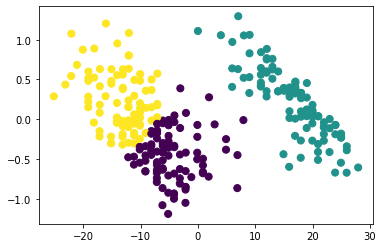

In [185]:
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')